In [1]:
import numpy as np
from matplotlib import pyplot as plt
import letalker as sv
from letalker.constants import fs

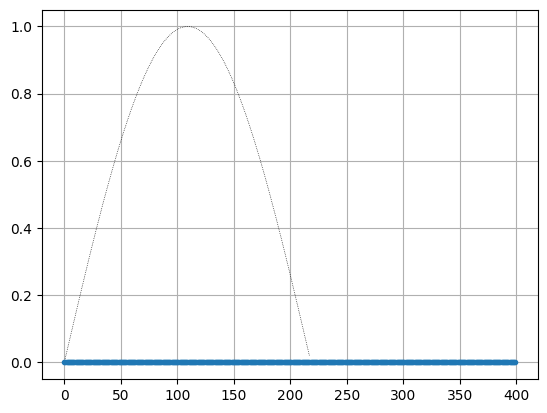

In [2]:
N = 400
ug = np.sin(2 * np.pi * 101 / fs * np.arange(round(fs / 101 / 2)))

vocaltract = sv.LeTalkerVocalTract("aa")

lips = sv.LeTalkerLips(vocaltract)
vocalfolds = sv.VocalFoldsUg([*ug, 0], upstream=0, downstream=vocaltract)  # unit-step function

lips.link(vocaltract)
vocalfolds.link(None, vocaltract)

vt_runner = vocaltract.create_runner(N)
lips_runner = lips.create_runner(N)
vf_runner = vocalfolds.create_runner(N)

fsg = beplx = blip = 0.0
for i in range(N):
    # Compute current pressure outputs from VOCAL FOLD
    feplx, bsg = vf_runner.step(i, fsg, beplx)

    # Compute the next states of flip & beplx
    flip, beplx = vt_runner.step(i, feplx, blip)
    blip = lips_runner.step(i, flip)

lips_res = lips.create_result(lips_runner)
po = lips_res.pout
plt.plot(ug, ":k", lw=0.5)
plt.plot(po, ".-")
plt.grid()

C:\Users\Takeshi Ikuma\AppData\Local\Temp\ipykernel_2668\2183129110.py:1: MatplotlibDeprecationWarning: Passing the Fs parameter of phase_spectrum() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  plt.phase_spectrum(po,fs);


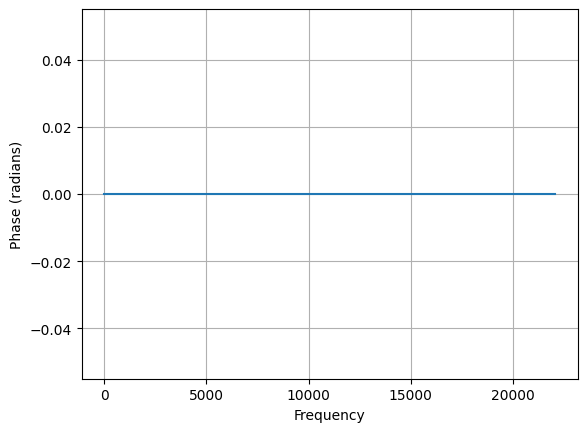

In [3]:
plt.phase_spectrum(po,fs);
plt.grid()
# plt.xlim(0,1000)
